In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
%matplotlib inline

In [2]:
oil = pd.read_excel('OilConsumption.xlsx')
oil.head()

,Year,Thousand Oil Barrels Daily
0,1965,11522.187698
1,1966,12100.347314
2,1967,12566.880466
3,1968,13404.548552
4,1969,14152.985096


In [3]:
co2 = pd.read_excel('co2_NOA.xlsx')
co2.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Yearly Average
0,2017,406.13,406.42,407.18,409.00,409.65,408.84,407.07,405.07,403.38,403.64,405.14,406.82,406.528333
1,2016,402.52,404.04,404.83,407.42,407.70,406.81,404.39,402.25,401.03,401.57,403.53,404.42,404.209167
2,2015,399.98,400.28,401.54,403.28,403.96,402.80,401.31,398.93,397.63,398.29,400.16,401.85,400.834167
3,2014,397.85,398.01,399.77,401.38,401.78,401.25,399.10,397.03,395.38,396.03,397.28,398.91,398.647500
4,2013,395.55,396.80,397.43,398.41,399.78,398.61,397.32,395.20,393.45,393.70,395.16,396.84,396.520833


In [4]:
oil_vs_co2 = oil.merge(co2, on="Year")
oil_vs_co2 = oil_vs_co2[["Year", "Thousand Oil Barrels Daily", 'Yearly Average']]
oil_vs_co2 = oil_vs_co2.rename(columns={'Yearly Average' : 'Avg CO2 (ppm)'})
oil_vs_co2.head()

,Year,Thousand Oil Barrels Daily,Avg CO2 (ppm)
0,1965,11522.187698,320.044167
1,1966,12100.347314,321.383333
2,1967,12566.880466,322.157500
3,1968,13404.548552,323.045000
4,1969,14152.985096,324.624167


In [5]:
#oil_vs_co2.dtypes
oil_vs_co2["Thousand Oil Barrels Daily"] = [int(x) for x in oil_vs_co2["Thousand Oil Barrels Daily"]]
oil_vs_co2["Avg CO2 (ppm)"] = [int(x) for x in oil_vs_co2["Avg CO2 (ppm)"]]

In [6]:
X = oil_vs_co2["Thousand Oil Barrels Daily"].values.reshape(-1, 1)
y = oil_vs_co2["Avg CO2 (ppm)"].values.reshape(-1, 1)

Text(0, 0.5, 'CO2 Contents (ppm)')

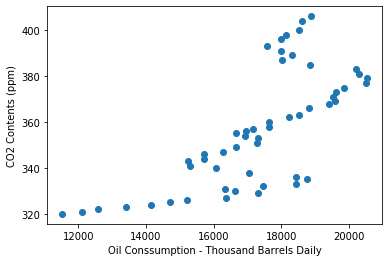

In [7]:
plt.scatter(X, y)
plt.xlabel("Oil Conssumption - Thousand Barrels Daily")
plt.ylabel("CO2 Air Content (ppm)")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X_test)

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 423.3808728072263
R-squared (R2 ): 0.3859732060363583


In [11]:
# X_train = X_train[:,0]
# y_train = y_train[:,0]

In [31]:
# from scipy.optimize import curve_fit

# def func_exp(x, a, b, c):
#     return a * np.exp(-b * x) + c

# def exponential_regression (x_data, y_data):
#     popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0.01, 1))
#     print(popt)
#     puntos = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
#     curva_regresion = plt.plot(x_data, func_exp(x_data, *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
#     plt.legend()
#     plt.show()
#     return func_exp(x_data, *popt)

In [23]:
# exponential_regression(X_train, y_train)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

df = oil_vs_co2

In [22]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Reshape data
X = df['Thousand Oil Barrels Daily'].values.reshape(-1, 1)
y = df['Avg CO2 (ppm)'].values.reshape(-1, 1)


# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)

    # print(f"{degree}, {test_score}")
    predicted = model.predict(X_test)

    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    print(degree)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2 ): {r2}\n--------------------------")

2
Mean Squared Error (MSE): 423.0147274433062
R-squared (R2 ): 0.3865042245078396
--------------------------
3
Mean Squared Error (MSE): 420.19896329586254
R-squared (R2 ): 0.39058791071819854
--------------------------
4
Mean Squared Error (MSE): 418.5016146619232
R-squared (R2 ): 0.39304956547606684
--------------------------
5
Mean Squared Error (MSE): 428.0690979415916
R-squared (R2 ): 0.37917390065076806
--------------------------
6
Mean Squared Error (MSE): 442.08124569906585
R-squared (R2 ): 0.3588521650300277
--------------------------
7
Mean Squared Error (MSE): 450.831111427328
R-squared (R2 ): 0.3461622861389153
--------------------------
8
Mean Squared Error (MSE): 450.23776738920367
R-squared (R2 ): 0.34702280951360454
--------------------------
